In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [7]:
data = pd.read_excel('C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/data/external/full_dataset.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Columns: 1061 entries, Diet to col1060
dtypes: float64(1060), object(1)
memory usage: 26.5+ MB


In [9]:
data.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,...,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,1.224632,1.212087,1.200541,1.189475,1.178933,1.168909,1.159350,1.150042,1.140407,1.129354,...,0.932007,0.932392,0.932800,0.933222,0.933647,0.934065,0.934470,0.934752,0.935129,0.935495
std,0.109307,0.107605,0.106066,0.104590,0.103169,0.101799,0.100490,0.099248,0.098046,0.096797,...,0.081245,0.081268,0.081293,0.081320,0.081349,0.081377,0.081405,0.081425,0.081454,0.081482
min,0.200451,0.197335,0.194482,0.191707,0.189006,0.186321,0.183667,0.180993,0.178249,0.175389,...,0.138458,0.138519,0.138579,0.138643,0.138712,0.138791,0.138879,0.138947,0.139043,0.139136
25%,1.201450,1.190346,1.180232,1.170511,1.161068,1.152576,1.144497,1.136638,1.128281,1.118568,...,0.923167,0.923471,0.923841,0.924323,0.924724,0.925075,0.925458,0.925821,0.926208,0.926546
50%,1.233044,1.220362,1.208841,1.197907,1.187339,1.177197,1.167856,1.158518,1.148715,1.137601,...,0.942554,0.942928,0.943285,0.943683,0.944053,0.944540,0.944912,0.945188,0.945576,0.945943
75%,1.263995,1.249970,1.236811,1.224258,1.212192,1.200616,1.189460,1.178745,1.168039,1.155896,...,0.958992,0.959360,0.959762,0.960177,0.960570,0.960999,0.961418,0.961694,0.962166,0.962636
max,1.489349,1.463645,1.440033,1.416911,1.393804,1.370367,1.346619,1.322929,1.299676,1.276790,...,0.999816,0.999555,0.999317,0.999167,0.999121,0.999148,0.999596,1.000010,1.000674,1.001356


In [10]:
data.head()

,Diet,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
0,GRS,1.285407,1.270682,1.256961,1.243545,1.230510,1.217927,1.205841,1.194133,1.182280,...,0.953018,0.953452,0.953923,0.954405,0.954882,0.955351,0.955824,0.956178,0.956678,0.957184
1,GRS,1.184143,1.174105,1.164920,1.156222,1.148060,1.140399,1.133123,1.125951,1.118246,...,0.978003,0.978359,0.978767,0.979192,0.979599,0.979972,0.980313,0.980553,0.980892,0.981262
2,GRS,1.367154,1.348666,1.331992,1.315673,1.299387,1.283017,1.266661,1.250464,1.234278,...,0.919751,0.920195,0.920649,0.921126,0.921624,0.922130,0.922627,0.922959,0.923418,0.923863
3,GRS,1.204441,1.193640,1.183685,1.174031,1.164706,1.155768,1.147259,1.139031,1.130472,...,0.972673,0.973021,0.973390,0.973784,0.974206,0.974654,0.975121,0.975456,0.975953,0.976483
4,GRS,1.280609,1.264384,1.250152,1.237041,1.224849,1.213294,1.202137,1.191109,1.179676,...,0.958123,0.958400,0.958773,0.959264,0.959864,0.960536,0.961223,0.961681,0.962278,0.962797


In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Diet']] = encoder.fit_transform(data[['Diet']])

In [12]:
X = data.drop(['Diet'] , axis=1)
y = data['Diet']

In [13]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [14]:
print("Training set shape : ",X_train.shape)
print("Validation set shape : ",X_valid.shape)
print("Testing set shape : ",X_test.shape)

Training set shape :  (1965, 1060)
Validation set shape :  (655, 1060)
Testing set shape :  (655, 1060)


In [15]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
for layer in range(10):
    model1.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model1.add(tf.keras.layers.Dense(3, activation="softmax"))

In [16]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [17]:
history1 = model1.fit(X_train ,  y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


62/62 [==============================] - 1s 5ms/step - loss: 1.1557 - accuracy: 0.3232 - val_loss: 1.1232 - val_accuracy: 0.3298
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 1.1087 - accuracy: 0.3079 - val_loss: 1.0979 - val_accuracy: 0.3450
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.3608 - val_loss: 1.1183 - val_accuracy: 0.3573
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 1.1034 - accuracy: 0.3359 - val_loss: 1.1242 - val_accuracy: 0.3130
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 1.1039 - accuracy: 0.3522 - val_loss: 1.0993 - val_accuracy: 0.3588
Epoch 6/20
62/62 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.3384 - val_loss: 1.0978 - val_accuracy: 0.3420
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.3476 - val_loss: 1.1028 - val_accuracy: 0.3328
Epoch 8/20
62/62 [=============

In [18]:
score = model1.evaluate(X_test, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.3328
Test Accuracy : 33.2824 %


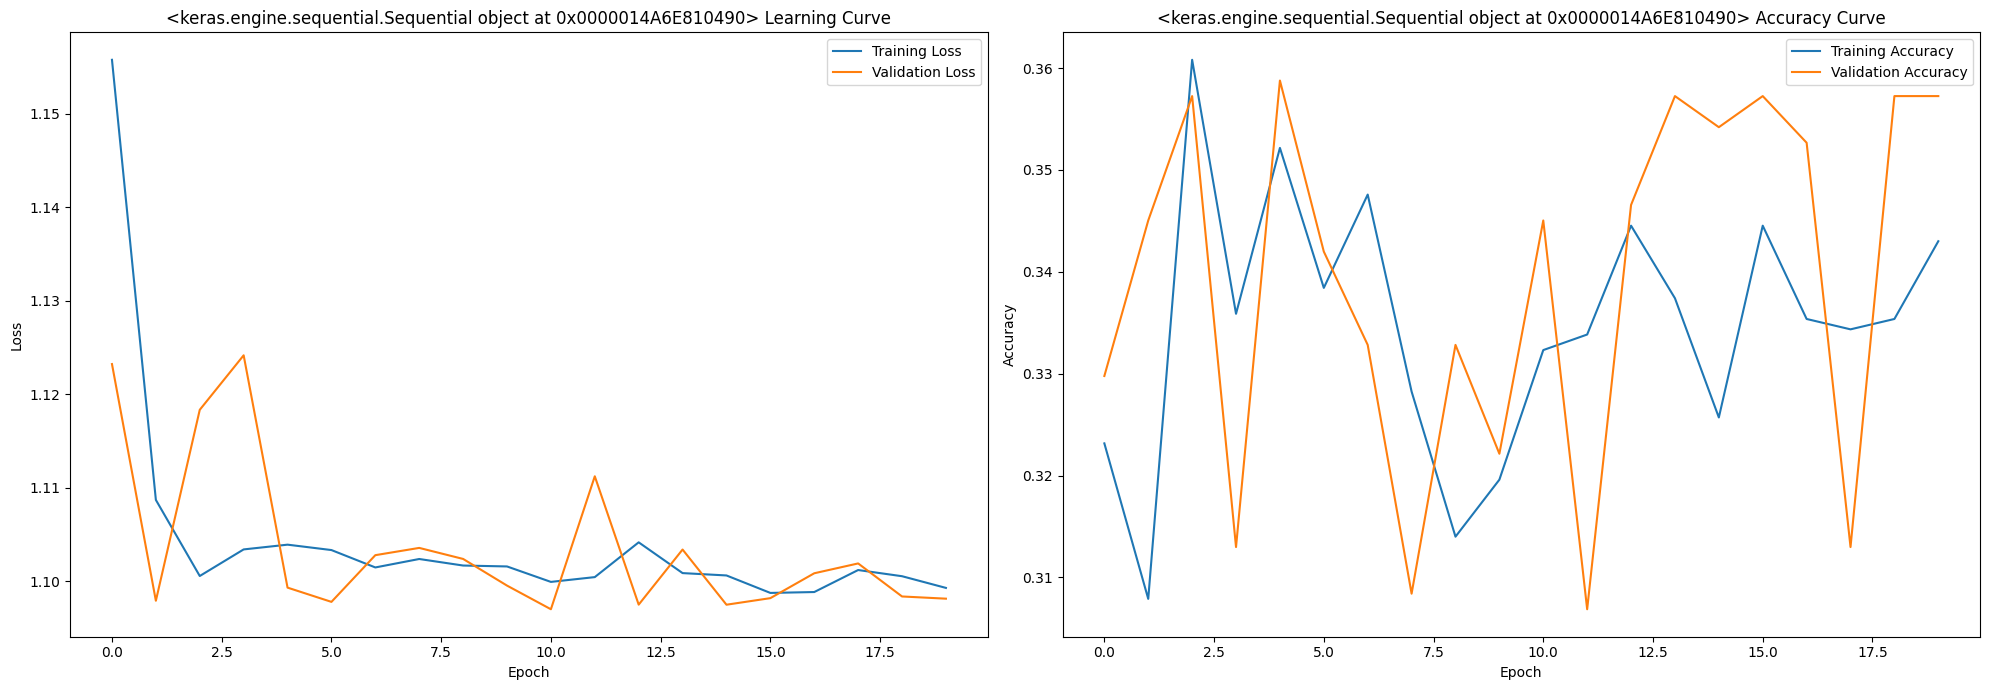

In [19]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history1, model1, axs[0])
plot_accuracy_curves(history1, model1, axs[1])

plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [21]:
X_pca_reduced = pca.fit_transform(X)

In [22]:
X_pca_reduced.shape

(3275, 26)

In [23]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_pca, y_train_full, y_test_pca = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [24]:
print("Training set shape : ",X_train_pca.shape)
print("Validation set shape : ",X_valid_pca.shape)
print("Testing set shape : ",X_test_pca.shape)

Training set shape :  (1965, 1060)
Validation set shape :  (655, 1060)
Testing set shape :  (655, 1060)


In [25]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten())
for layer in range(10):
    model2.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model2.add(tf.keras.layers.Dense(3, activation="softmax"))

In [26]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [27]:
history2 = model2.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 1s 5ms/step - loss: 1.1330 - accuracy: 0.3455 - val_loss: 1.1228 - val_accuracy: 0.3405
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1083 - accuracy: 0.3593 - val_loss: 1.1267 - val_accuracy: 0.3328
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0904 - accuracy: 0.4092 - val_loss: 1.1109 - val_accuracy: 0.3527
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.4356 - val_loss: 1.1241 - val_accuracy: 0.3145
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0695 - accuracy: 0.4402 - val_loss: 1.1080 - val_accuracy: 0.3252
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0621 - accuracy: 0.4494 - val_loss: 1.1102 - val_accuracy: 0.3481
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.4692 - val_loss: 1.1306 - val_accuracy: 0.3191
Epoch 8/20
62/62 [=============

In [28]:
score = model2.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

 1/21 [>.............................] - ETA: 0s - loss: 1.3559 - accuracy: 0.2500

21/21 [==============================] - 0s 1ms/step - loss: 1.2728 - accuracy: 0.3038
Test Accuracy : 30.3817 %


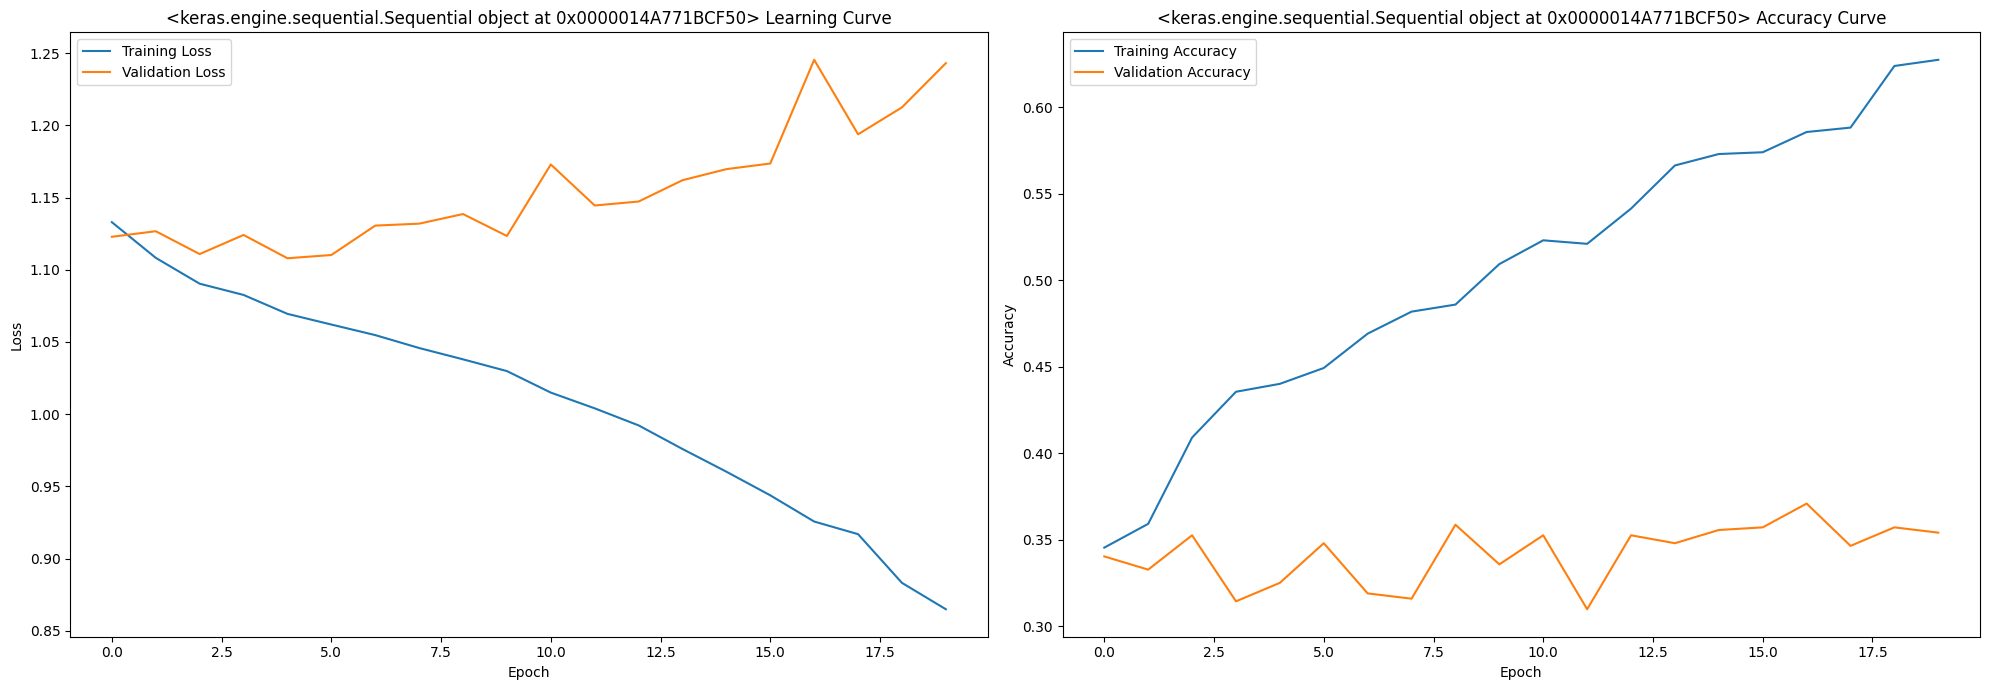

In [29]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history2, model2, axs[0])
plot_accuracy_curves(history2, model2, axs[1])

plt.tight_layout()
plt.show()

In [30]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten())
for layer in range(10):
    model3.add(tf.keras.layers.Dense(500, activation="relu",
                                    kernel_initializer="he_normal"))
model3.add(tf.keras.layers.Dense(3, activation="softmax"))

In [31]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [32]:
history3 = model3.fit(X_train ,  y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


62/62 [==============================] - 2s 17ms/step - loss: 1.2040 - accuracy: 0.3130 - val_loss: 1.1399 - val_accuracy: 0.3298
Epoch 2/20
62/62 [==============================] - 1s 14ms/step - loss: 1.1124 - accuracy: 0.3155 - val_loss: 1.1013 - val_accuracy: 0.3298
Epoch 3/20
62/62 [==============================] - 1s 15ms/step - loss: 1.1011 - accuracy: 0.3603 - val_loss: 1.1163 - val_accuracy: 0.3573
Epoch 4/20
62/62 [==============================] - 1s 15ms/step - loss: 1.1045 - accuracy: 0.3440 - val_loss: 1.1459 - val_accuracy: 0.3130
Epoch 5/20
62/62 [==============================] - 1s 15ms/step - loss: 1.1039 - accuracy: 0.3461 - val_loss: 1.1019 - val_accuracy: 0.3542
Epoch 6/20
62/62 [==============================] - 1s 15ms/step - loss: 1.1047 - accuracy: 0.3359 - val_loss: 1.0977 - val_accuracy: 0.3573
Epoch 7/20
62/62 [==============================] - 1s 15ms/step - loss: 1.1040 - accuracy: 0.3384 - val_loss: 1.1056 - val_accuracy: 0.3191
Epoch 8/20
62/62 [======

In [33]:
score = model3.evaluate(X_test, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

 1/21 [>.............................] - ETA: 0s - loss: 1.1255 - accuracy: 0.3125

21/21 [==============================] - 0s 5ms/step - loss: 1.1010 - accuracy: 0.3344
Test Accuracy : 33.4351 %


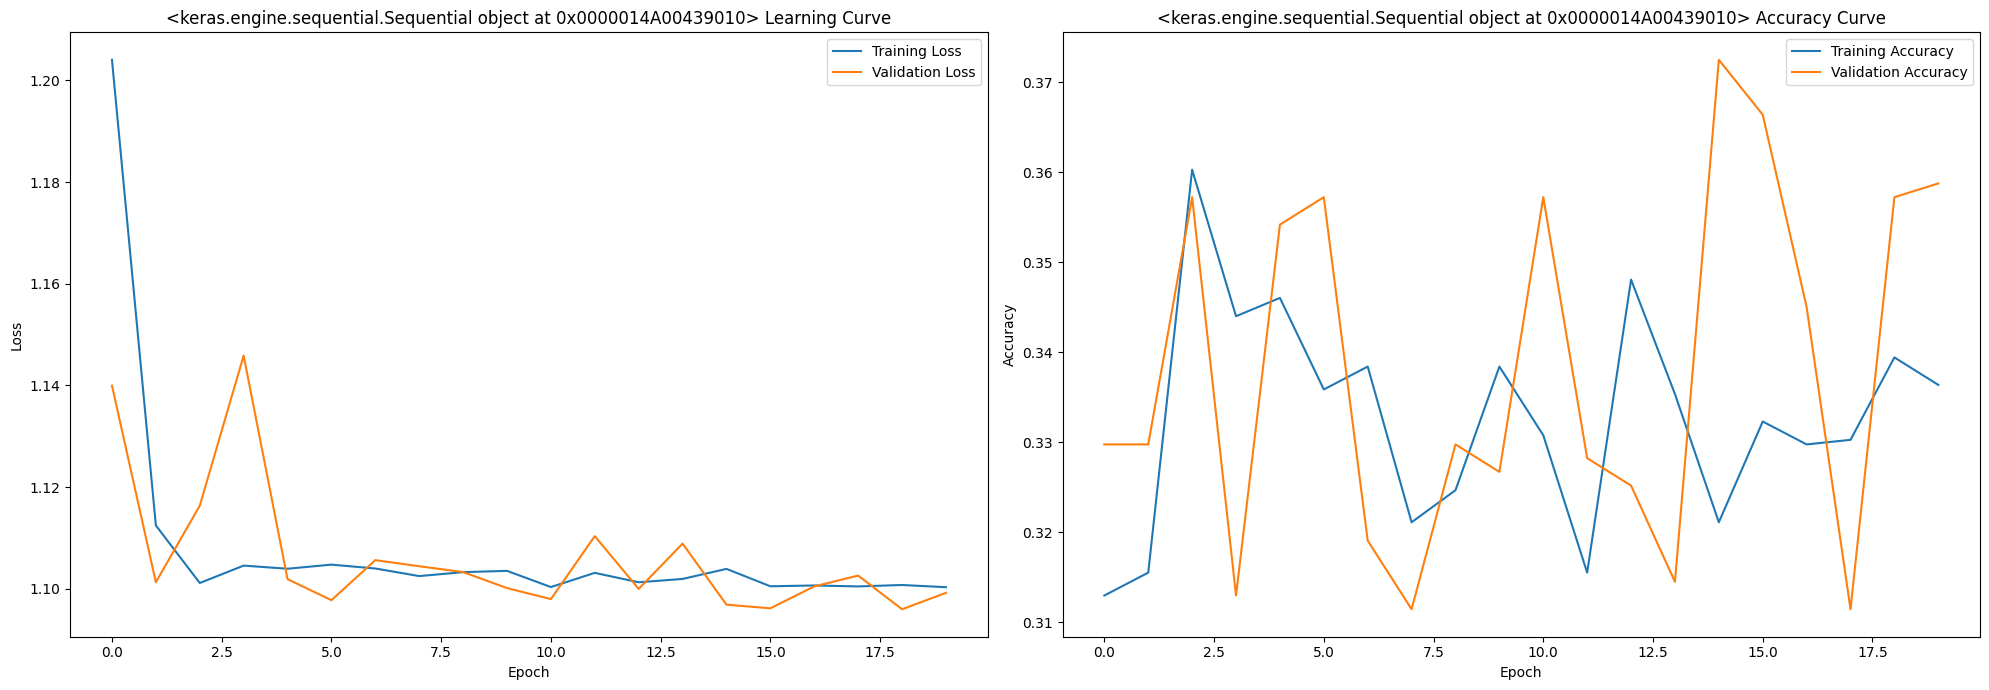

In [34]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history3, model3, axs[0])
plot_accuracy_curves(history3, model3, axs[1])

plt.tight_layout()
plt.show()

In [35]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten())
for layer in range(10):
    model4.add(tf.keras.layers.Dense(500, activation="relu",
                                    kernel_initializer="he_normal"))
model4.add(tf.keras.layers.Dense(3, activation="softmax"))

In [36]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [37]:
history4 = model4.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 2s 15ms/step - loss: 1.1719 - accuracy: 0.3364 - val_loss: 1.1593 - val_accuracy: 0.3328
Epoch 2/20
62/62 [==============================] - 1s 12ms/step - loss: 1.1018 - accuracy: 0.3949 - val_loss: 1.1329 - val_accuracy: 0.3374
Epoch 3/20
62/62 [==============================] - 1s 12ms/step - loss: 1.0562 - accuracy: 0.4646 - val_loss: 1.1313 - val_accuracy: 0.3115
Epoch 4/20
62/62 [==============================] - 1s 12ms/step - loss: 1.0178 - accuracy: 0.5384 - val_loss: 1.2035 - val_accuracy: 0.3115
Epoch 5/20
62/62 [==============================] - 1s 12ms/step - loss: 0.9779 - accuracy: 0.5766 - val_loss: 1.1473 - val_accuracy: 0.3542
Epoch 6/20
62/62 [==============================] - 1s 12ms/step - loss: 0.9373 - accuracy: 0.6005 - val_loss: 1.1565 - val_accuracy: 0.3359
Epoch 7/20
62/62 [==============================] - 1s 12ms/step - loss: 0.9043 - accuracy: 0.6183 - val_loss: 1.3224 - val_accuracy: 0.3267
Epoch 8/20
62/62 [======

In [38]:
score = model4.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

 1/21 [>.............................] - ETA: 0s - loss: 3.0289 - accuracy: 0.2812

21/21 [==============================] - 0s 4ms/step - loss: 2.1594 - accuracy: 0.3481
Test Accuracy : 34.8092 %


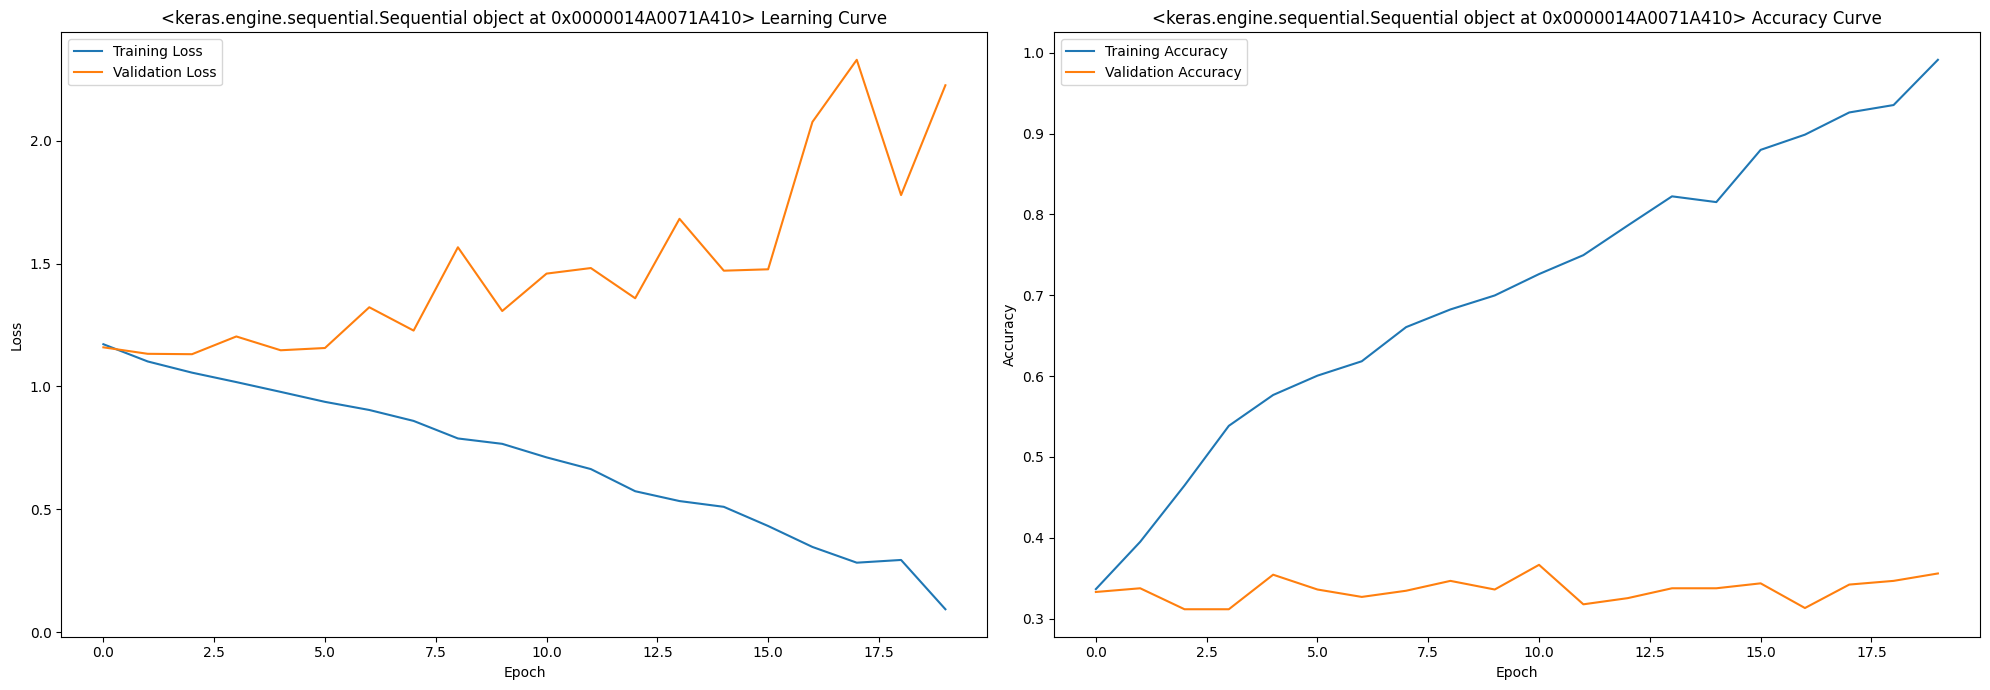

In [39]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history4, model4, axs[0])
plot_accuracy_curves(history4, model4, axs[1])

plt.tight_layout()
plt.show()

In [40]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

In [41]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [42]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9 , beta_2=0.999),
              metrics=["accuracy"])

In [43]:
history5 = model5.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 4s 18ms/step - loss: 1.5143 - accuracy: 0.3165 - val_loss: 1.2449 - val_accuracy: 0.3511
Epoch 2/20
62/62 [==============================] - 1s 13ms/step - loss: 1.3014 - accuracy: 0.3639 - val_loss: 1.2006 - val_accuracy: 0.3511
Epoch 3/20
62/62 [==============================] - 1s 13ms/step - loss: 1.2266 - accuracy: 0.3791 - val_loss: 1.1561 - val_accuracy: 0.3359
Epoch 4/20
62/62 [==============================] - 1s 14ms/step - loss: 1.1942 - accuracy: 0.3552 - val_loss: 1.1438 - val_accuracy: 0.3649
Epoch 5/20
62/62 [==============================] - 1s 13ms/step - loss: 1.1826 - accuracy: 0.3578 - val_loss: 1.1539 - val_accuracy: 0.3313
Epoch 6/20
62/62 [==============================] - 1s 13ms/step - loss: 1.1442 - accuracy: 0.3847 - val_loss: 1.1424 - val_accuracy: 0.3267
Epoch 7/20
62/62 [==============================] - 1s 13ms/step - loss: 1.1165 - accuracy: 0.4010 - val_loss: 1.1579 - val_accuracy: 0.3160
Epoch 8/20
62/62 [======

In [44]:
score = model5.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

 1/21 [>.............................] - ETA: 0s - loss: 1.2621 - accuracy: 0.2188

21/21 [==============================] - 0s 3ms/step - loss: 1.1704 - accuracy: 0.3466
Test Accuracy : 34.6565 %


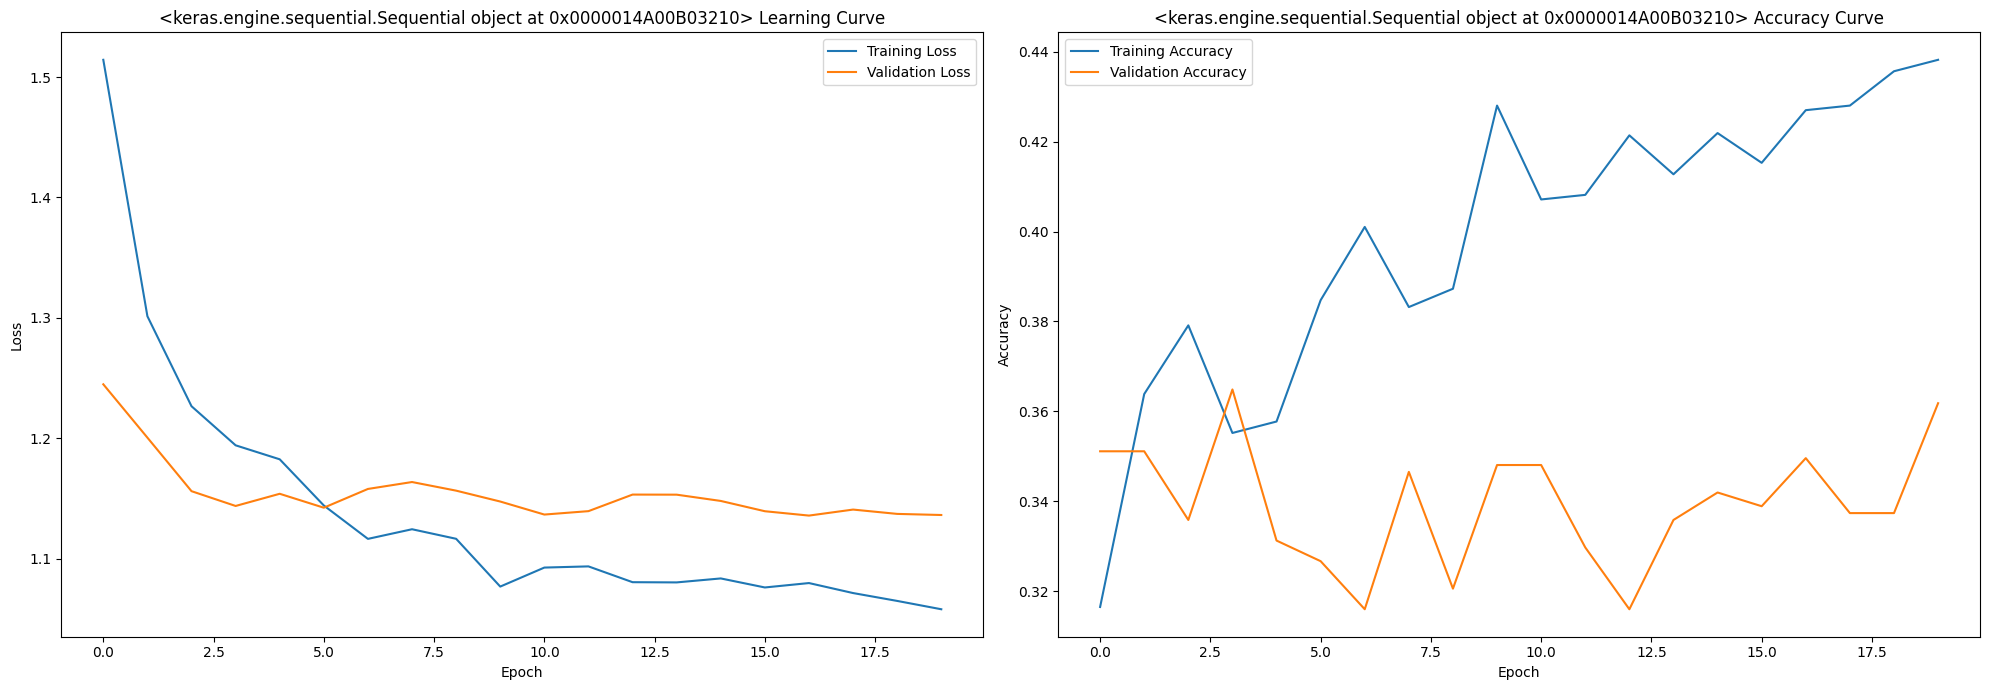

In [45]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history5, model5, axs[0])
plot_accuracy_curves(history5, model5, axs[1])

plt.tight_layout()
plt.show()

In [46]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [47]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9 , beta_2=0.999),
              metrics=["accuracy"])

In [48]:
history6 = model6.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 3s 9ms/step - loss: 1.5077 - accuracy: 0.3211 - val_loss: 1.1536 - val_accuracy: 0.3481
Epoch 2/20
62/62 [==============================] - 0s 6ms/step - loss: 1.3618 - accuracy: 0.3461 - val_loss: 1.1460 - val_accuracy: 0.3389
Epoch 3/20
62/62 [==============================] - 0s 6ms/step - loss: 1.2504 - accuracy: 0.3720 - val_loss: 1.1279 - val_accuracy: 0.3435
Epoch 4/20
62/62 [==============================] - 0s 6ms/step - loss: 1.2172 - accuracy: 0.3593 - val_loss: 1.1325 - val_accuracy: 0.3756
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 1.1719 - accuracy: 0.3705 - val_loss: 1.1334 - val_accuracy: 0.3374
Epoch 6/20
62/62 [==============================] - 0s 6ms/step - loss: 1.1661 - accuracy: 0.3547 - val_loss: 1.1316 - val_accuracy: 0.3130
Epoch 7/20
62/62 [==============================] - 0s 6ms/step - loss: 1.1377 - accuracy: 0.3796 - val_loss: 1.1222 - val_accuracy: 0.3420
Epoch 8/20
62/62 [=============

In [49]:
score = model6.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 2ms/step - loss: 1.1167 - accuracy: 0.3450
Test Accuracy : 34.5038 %


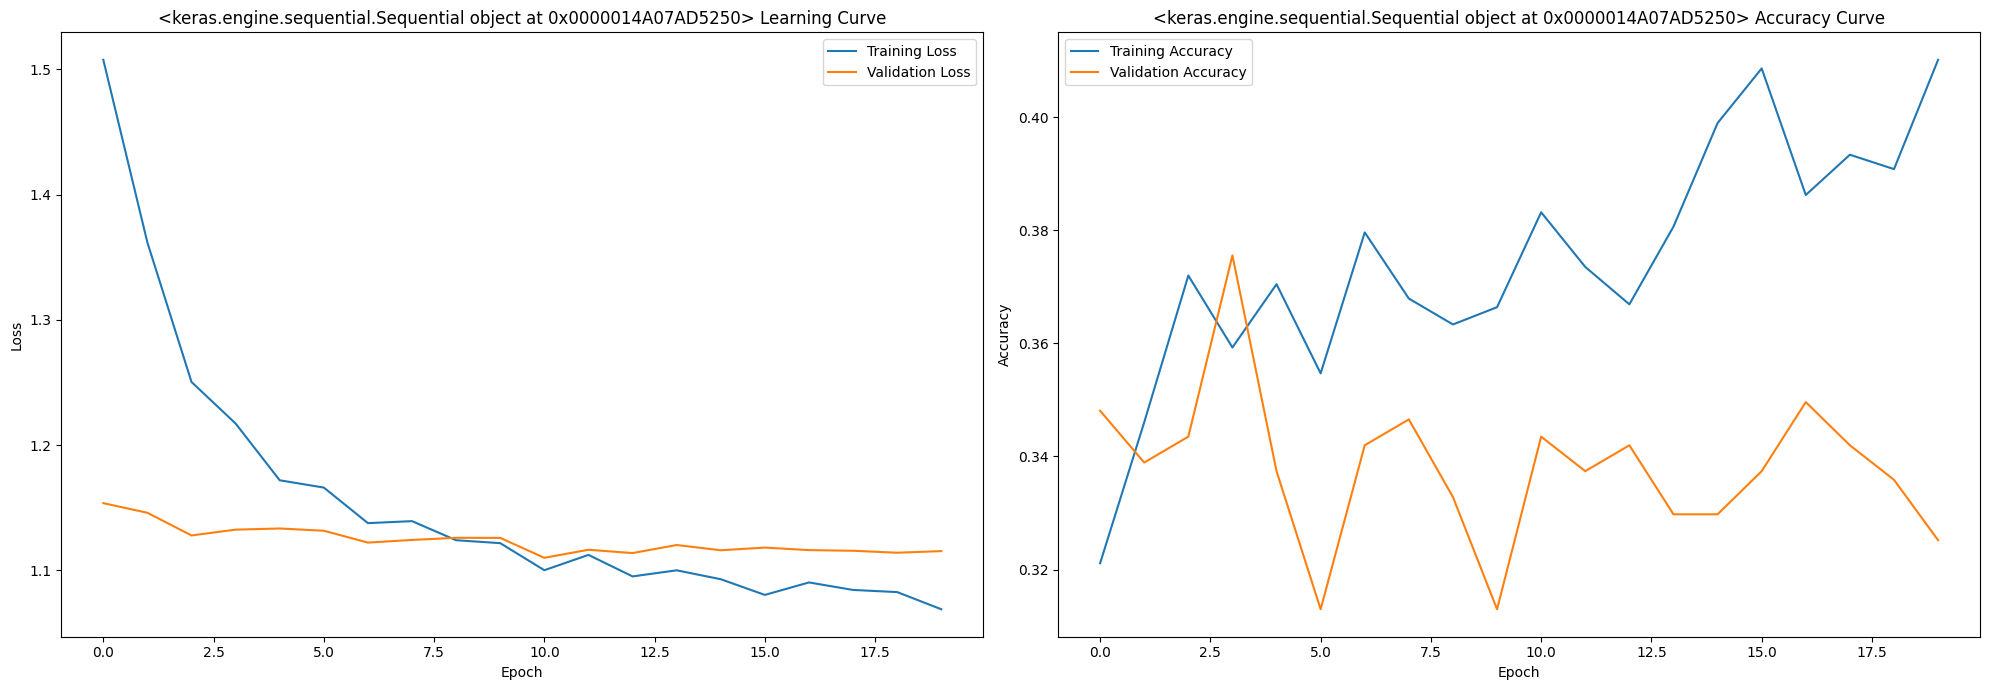

In [50]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history6, model6, axs[0])
plot_accuracy_curves(history6, model6, axs[1])

plt.tight_layout()
plt.show()

In [51]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(256, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(16, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [52]:
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [53]:
history7 = model7.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10


62/62 [==============================] - 6s 76ms/step - loss: 1.9332 - accuracy: 0.3079 - val_loss: 1.1190 - val_accuracy: 0.3496
Epoch 2/10
62/62 [==============================] - 5s 73ms/step - loss: 1.2155 - accuracy: 0.3232 - val_loss: 1.1066 - val_accuracy: 0.3679
Epoch 3/10
62/62 [==============================] - 4s 71ms/step - loss: 1.1601 - accuracy: 0.3461 - val_loss: 1.0967 - val_accuracy: 0.3099
Epoch 4/10
62/62 [==============================] - 4s 71ms/step - loss: 1.1647 - accuracy: 0.3094 - val_loss: 1.0989 - val_accuracy: 0.3145
Epoch 5/10
62/62 [==============================] - 4s 70ms/step - loss: 1.1375 - accuracy: 0.3237 - val_loss: 1.1062 - val_accuracy: 0.3573
Epoch 6/10
62/62 [==============================] - 4s 70ms/step - loss: 1.1345 - accuracy: 0.3303 - val_loss: 1.1535 - val_accuracy: 0.3511
Epoch 7/10
62/62 [==============================] - 4s 70ms/step - loss: 1.1294 - accuracy: 0.3318 - val_loss: 1.0993 - val_accuracy: 0.3588
Epoch 8/10
62/62 [======

In [54]:
score = model7.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

 1/21 [>.............................] - ETA: 0s - loss: 1.0997 - accuracy: 0.2812

21/21 [==============================] - 0s 9ms/step - loss: 1.0987 - accuracy: 0.3313
Test Accuracy : 33.1298 %


In [55]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(256, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(16, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [56]:
model8.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [57]:
history8 = model8.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10


62/62 [==============================] - 6s 76ms/step - loss: 12.2103 - accuracy: 0.3282 - val_loss: 1.1998 - val_accuracy: 0.3298
Epoch 2/10
62/62 [==============================] - 4s 73ms/step - loss: 1.3639 - accuracy: 0.3221 - val_loss: 1.0981 - val_accuracy: 0.3573
Epoch 3/10
62/62 [==============================] - 4s 72ms/step - loss: 1.2741 - accuracy: 0.3150 - val_loss: 1.0977 - val_accuracy: 0.3573
Epoch 4/10
62/62 [==============================] - 4s 72ms/step - loss: 1.2845 - accuracy: 0.3196 - val_loss: 1.0972 - val_accuracy: 0.3573
Epoch 5/10
62/62 [==============================] - 4s 71ms/step - loss: 1.2958 - accuracy: 0.3140 - val_loss: 1.1009 - val_accuracy: 0.3573
Epoch 6/10
62/62 [==============================] - 4s 71ms/step - loss: 1.1442 - accuracy: 0.3298 - val_loss: 1.0977 - val_accuracy: 0.3573
Epoch 7/10
62/62 [==============================] - 4s 71ms/step - loss: 1.1244 - accuracy: 0.3298 - val_loss: 1.1016 - val_accuracy: 0.3130
Epoch 8/10
62/62 [=====

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2048, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Learning rate scheduling
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)



In [62]:
history = model.fit(X_train_pca ,  y_train_pca, epochs=50,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/50


62/62 [==============================] - 5s 74ms/step - loss: 1.1013 - accuracy: 0.3415 - val_loss: 1.0957 - val_accuracy: 0.3603
Epoch 2/50
62/62 [==============================] - 5s 75ms/step - loss: 1.1007 - accuracy: 0.3389 - val_loss: 1.0954 - val_accuracy: 0.3664
Epoch 3/50
62/62 [==============================] - 5s 75ms/step - loss: 1.1011 - accuracy: 0.3354 - val_loss: 1.0980 - val_accuracy: 0.3420
Epoch 4/50
62/62 [==============================] - 5s 73ms/step - loss: 1.1001 - accuracy: 0.3476 - val_loss: 1.0989 - val_accuracy: 0.3359
Epoch 5/50
62/62 [==============================] - 5s 73ms/step - loss: 1.0976 - accuracy: 0.3562 - val_loss: 1.1037 - val_accuracy: 0.3573
Epoch 6/50
62/62 [==============================] - 5s 73ms/step - loss: 1.0969 - accuracy: 0.3405 - val_loss: 1.0975 - val_accuracy: 0.3634
Epoch 7/50
62/62 [==============================] - 5s 73ms/step - loss: 1.0960 - accuracy: 0.3557 - val_loss: 1.1040 - val_accuracy: 0.3206
Epoch 8/50
62/62 [======

In [63]:
score = model.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 9ms/step - loss: 1.2570 - accuracy: 0.3420
Test Accuracy : 34.1985 %


In [67]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(2048, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(1024),
    tf.keras.layers.Dense(3 , activation="softmax")
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
history = model.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10
62/62 [==============================] - 32s 491ms/step - loss: 2.7315 - accuracy: 0.3221 - val_loss: 1.2220 - val_accuracy: 0.3344
Epoch 2/10
62/62 [==============================] - 31s 507ms/step - loss: 1.3502 - accuracy: 0.3354 - val_loss: 1.4980 - val_accuracy: 0.3557
Epoch 3/10
62/62 [==============================] - 30s 492ms/step - loss: 1.4991 - accuracy: 0.3415 - val_loss: 1.5831 - val_accuracy: 0.3099
Epoch 4/10
62/62 [==============================] - 30s 485ms/step - loss: 1.5335 - accuracy: 0.3079 - val_loss: 1.4707 - val_accuracy: 0.3145
Epoch 5/10
62/62 [==============================] - 30s 487ms/step - loss: 1.4722 - accuracy: 0.3328 - val_loss: 2.2256 - val_accuracy: 0.3527
Epoch 6/10
62/62 [==============================] - 30s 484ms/step - loss: 1.9007 - accuracy: 0.3298 - val_loss: 1.6109 - val_accuracy: 0.3328
Epoch 7/10
62/62 [==============================] - 30s 492ms/step - loss: 1.5438 - accuracy: 0.3257 - val_loss: 1.6732 - val_accuracy: 0.3344

In [70]:
score = model.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 2s 111ms/step - loss: 1.8573 - accuracy: 0.3450
Test Accuracy : 34.5038 %
